In [27]:
with open('beep.txt') as f:
    lines = f.readlines()
    #split by tab
    myLines = []
    for line in lines:
        #  if lines contain tab
        if '\t' in line:
            #split by tab
            myLines.append(line.split('\t')[-1])
        else:
            myLines.append(line.split(' ')[-1])
    lines = myLines
    with open('phonemes_beep.txt', 'w') as f:
        f.writelines(lines)
    

In [28]:
#  create array of words for each sentence
sentences = []
with open ('phonemes_beep.txt') as f:
    lines = f.readlines()
    #split the words in each line by 1st space
    for line in lines:
        words = line.split(' ')
        # trim \n and spaces from last word
        words[-1] = words[-1].replace('\n', '')
        sentences.append(words)
# print(sentences)

In [29]:
# train a gensim word2vec model with sentences array
from gensim.models import Word2Vec
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index)
print(words)
# access vector for one word
# save the model
model.save('beep_phoneme2vec.model')

Word2Vec<vocab=45, vector_size=100, alpha=0.025>
['ih', 'ax', 'n', 't', 's', 'l', 'r', 'z', 'k', 'd', 'm', 'eh', 'p', 'ae', 'iy', 'b', 'ey', 'oh', 'ah', 'ay', 'f', 'ng', 'ow', 'g', 'v', 'sh', 'ao', 'aa', 'w', 'uw', 'hh', 'y', 'jh', 'er', 'ia', 'ch', 'uh', 'aw', 'th', 'ea', 'ua', 'oy', 'dh', 'zh', 'sil']


In [30]:
#get similarity between all pairs of words
for i in range(len(words)):
    for j in range(i+1, len(words)):
        l = (words[i], words[j], model.wv.similarity(words[i], words[j]))

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

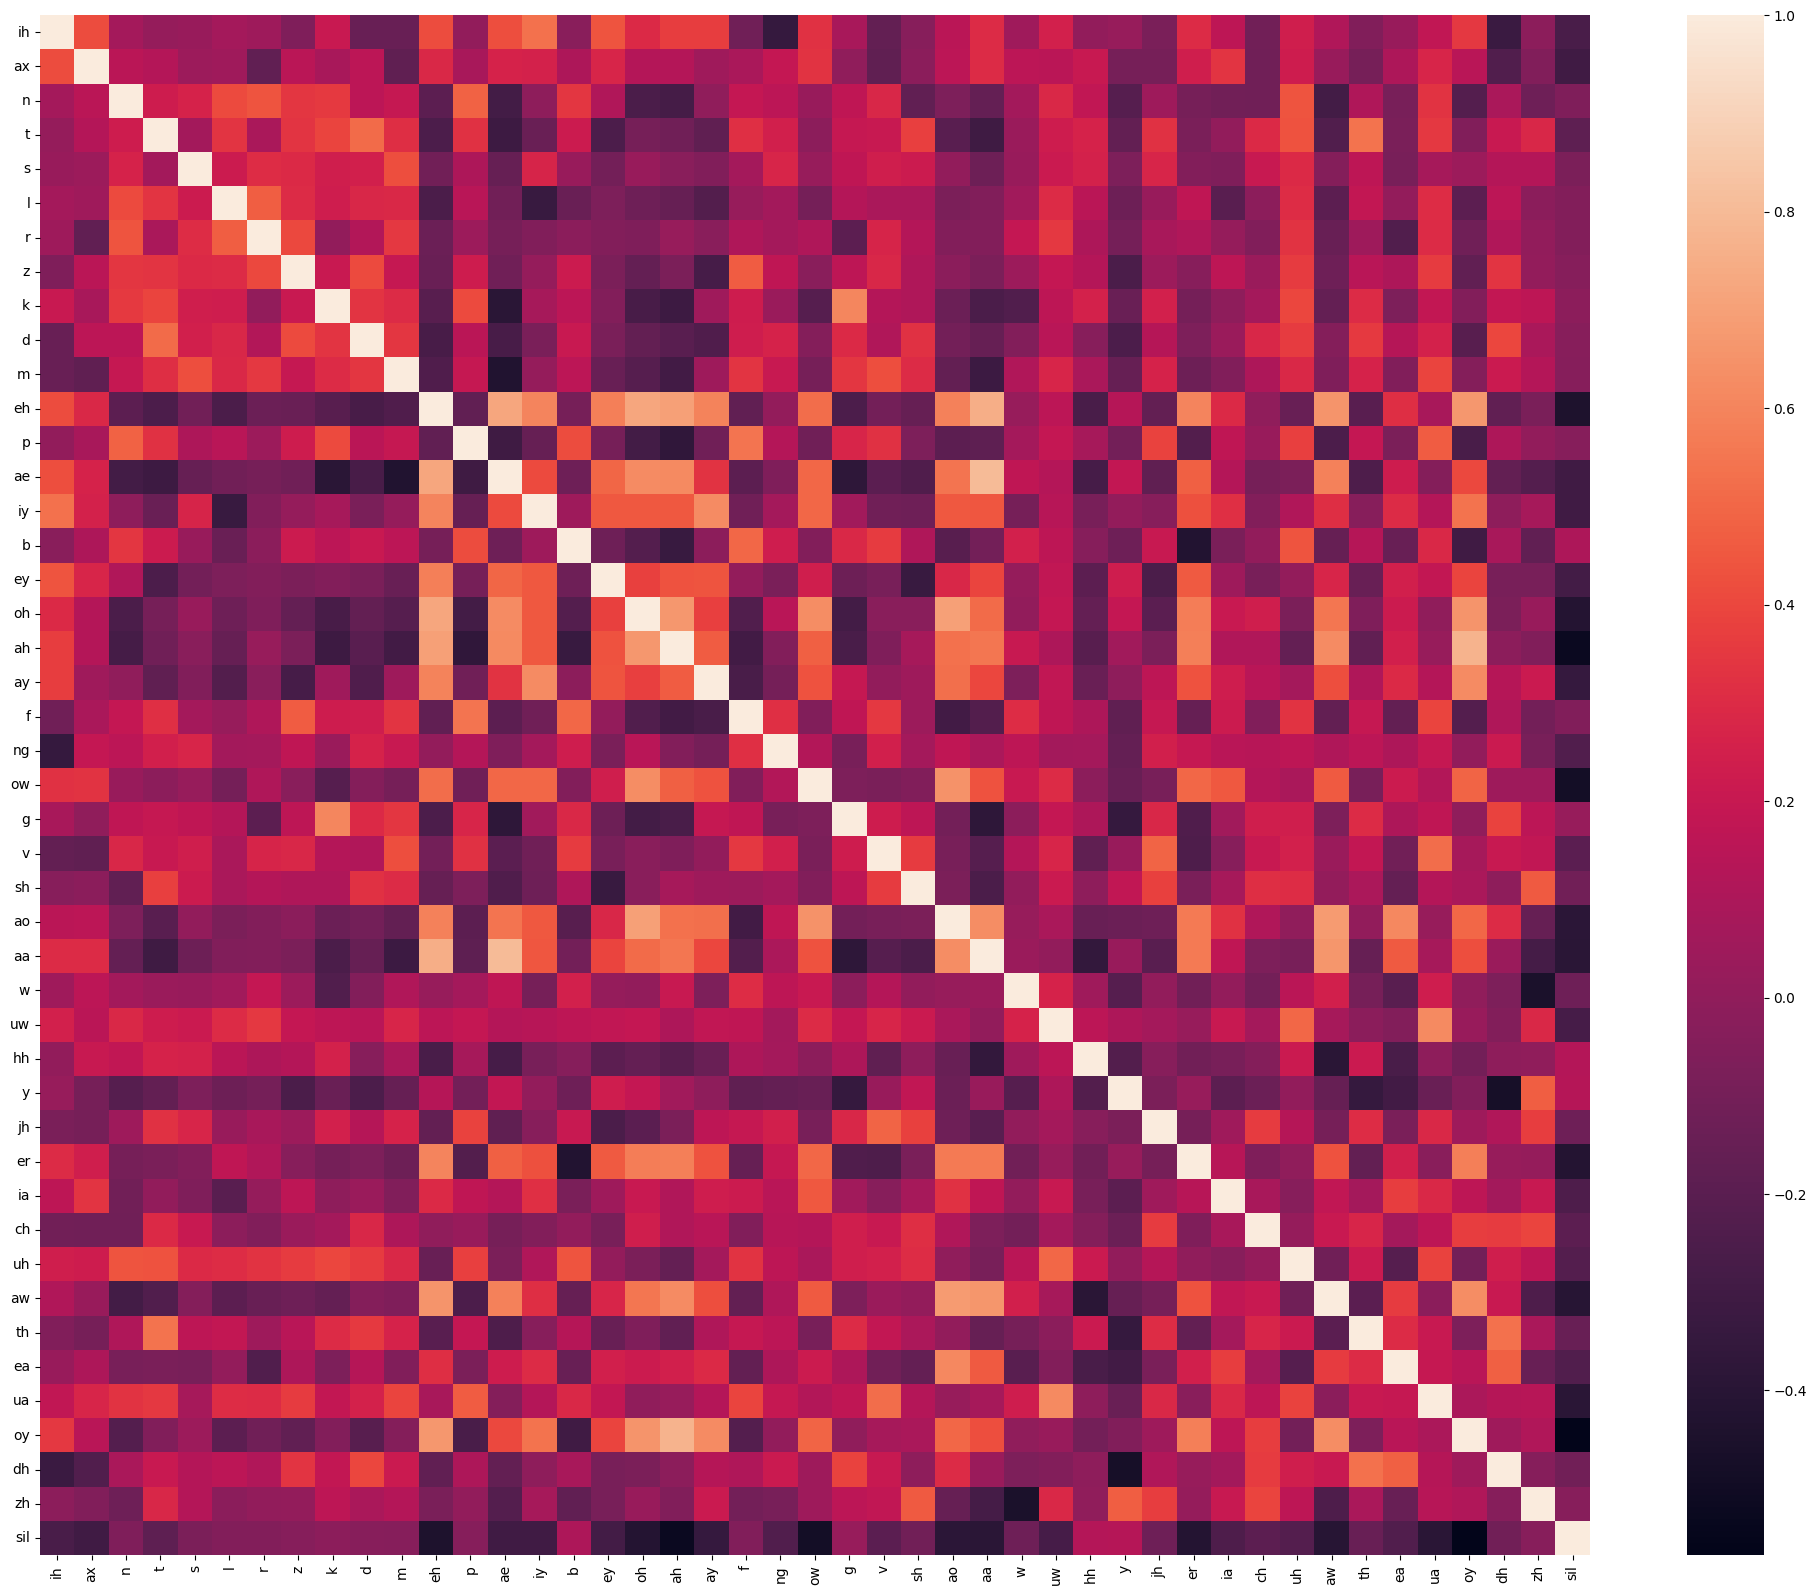

In [32]:
# heat map of similarity between all pairs of words
# create a matrix of zeros
matrix = np.zeros((len(words), len(words)))
# fill the matrix with similarity values
for i in range(len(words)):
    for j in range(0, len(words)):
        matrix[i][j] = model.wv.similarity(words[i], words[j])
# create a heatmap
sns.heatmap(matrix, xticklabels=words, yticklabels=words)
#increase the size of the plot
plt.gcf().set_size_inches(25, 20)
plt.show()